# PyTorch Workflows

In [1]:
what_were_covering = { 1: "data (prepare and load)", 
                       2: "build model",
                       3: "fitting the model to data (training)", 
                       4: "making predictions and evaluting a model",
                       5: "saving and loading a model", 
                       6: "putting it all together"
}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluting a model',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [1]:
import torch 
from torch import nn # nn contains all of PyTorch's building blocks for neural network!
import matplotlib.pyplot as plt 

In [4]:
torch.__version__

'2.1.0+cu121'

## 1) Data (Preparing and Loading)  

Data can be almost anything... in machine learning!

* Excel Sheets,
* Images of any kind,
* Videos (Youtube has lots of data...)
* Audio like songs and Podcasts
* DNA
* Text Data

Machine Learning is a game of two parts: 
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some **known** data using the linear regression formula. 

We'll use a linear regression formula to make a straight line with **known parameter**  

In [2]:
#Create known parameter 
weight = 0.7
bias = 0.3 

#create data
start = 0 
end = 1 
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)

y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [4]:
#this is how y is getting popoulated!
weight * 0.0200 + bias

0.314

### Splitting data into Train, Test sets

1. Training set
2. Validation set
3. Test set

In [5]:
0.8 * len(X) # getting 80% of data from whole dataset

40.0

In [3]:
# Create a train/test split
train_split = int(0.8 * len(X))
train_split

40

In [4]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"Training set: {X_train.shape}, {y_train.shape}")

Training set: torch.Size([40, 1]), torch.Size([40, 1])


How might we better view our data? 

This is where the data explorer's motto comes in! 

"Visualize, Visualize..."

In [5]:
def plot_prediction(train_data=X_train, train_label=y_train, 
                   test_data=X_test, test_label = y_test, predictions=None):
    """
    Plots training data, test data and compares predictions. 
    """
    plt.figure(figsize=(10,7))

    # Plot Training data in blue
    plt.scatter(train_data, train_label, c="b", s=4, label="Training data")

    #plot test data in green
    plt.scatter(test_data, test_label, c="g", s=4, label="Test data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    #Show the legends
    plt.legend(prop={"size": 10})
       

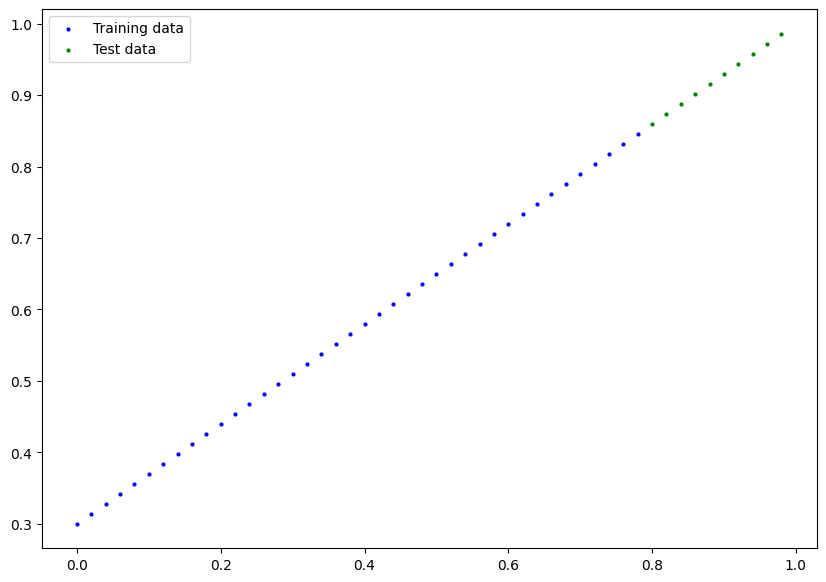

In [6]:
plot_prediction()

### 2. Building Model 

Linear Regression Model

what our model does: 
* Start with random values (weights and Bias)
* Looks at the training data and adjust the random values to better represent (or get closer to) the ideal values (weights & Bias).

How does it do so? 

Through two main alogirthms:
1. Gradient Descent
2. Backpropagation

In [7]:
from torch import nn

#Create a linear regression model class
#we are inheritting nn module
class LinearRegressionModel(nn.Module): # <- Almost everything in pytorch inherhits from nn.Module
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(1, 
                                              requires_grad=True, 
                                              dtype=torch.float))
        
        self.bias = nn.Parameter(torch.rand(1, 
                                           requires_grad=True, 
                                           dtype=torch.float))

    #forward method is defined to describe the computation in the model.
    def forward(self, x: torch.Tensor) ->  torch.Tensor:
        #x is input data
        return self.weight * x + self.bias #linear regression formula.

### PyTorch model building Essentials 

* torch.nn -> contains all of the building blocks for Neural Networks (computational graph).
* torch.nn.Parameters -> what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.
* torch.nn.Module -> The base class for all the neural network modules, if you subclass it, you should overwrite forward().   7
* torch.optim -> this where the optimizers in Pytorch live, they will help in gradient descent.
* def forward() - All nn.modules subclasses, requires you to overwrite forward(), this is method defines what happens in the forward computation.   

### Checking the contents of our PyTorch Model. 

Now we've created a model, let's see what's inside....

So we can check out model's parameters or what's inside our model using '.parameters()'

In [8]:
#Create a random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

#Create a instance of the model. 
model_0 = LinearRegressionModel()

#Check out the parameters
model_0

#generator object
model_0.parameters()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [12]:
#List of named Parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

### Making Prediction using 'torch.inference_mode()'

To check our model's Predictive power, let's see how well it predicts 'y_test' based on 'x_test' 

When we pass data through our model, it's going to run it through the 'forward()'.

In [13]:
#These are our test data
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [14]:
#these are test label (Actual)
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [9]:
#Make Predictions with model
with torch.inference_mode():
    y_pred = model_0(X_test)

#Predicted values
y_pred

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [16]:
#Actual values
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

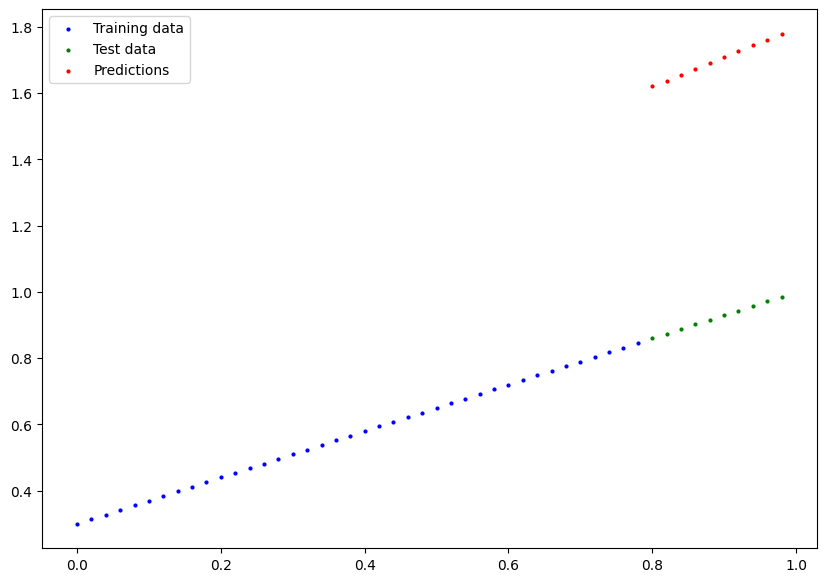

In [17]:
#Visualize our predictions
plot_prediction(predictions=y_pred)

### For Predictions (Inference) we have two options

#### Option-1 

Using model without context manager

In [18]:
y_preds = model_0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]], grad_fn=<AddBackward0>)

#### Option-2 
With context Manager

What inference_mode() does ? 

It will turn off that gradient tracking! 

Essentially It will remove all the gradients tracking which is useless when we are doing inference!

Disables all the gradient tracking which are used in Training (for updation of weights and bias). 

Before: In pytorch, there are using torch.no_grad() -> to get..

torch.no_grad() replaced with torch.inference_mode() (Context Manager)!

**It will make your inference code in PyTorch run Faster**

See more about Inference mode here: https://pytorch.org/docs/stable/generated/torch.inference_mode.html

**You can also do something similar with torch.no_grad(), however inference_mode() is preferred**

In [17]:
#Make Predictions with model
with torch.inference_mode(): #Context Manager
    y_pred = model_0(X_test)

#Predicted values
y_pred

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

## 3. Training the model

The whole idea of training is for a model to move from some **unknown** parameters (these may be random) to some **know parameters**

Or In other words, from a poor representation of the data to better representation of data!

One way to measure how poor or how wrong our model's predictions are is to use **Loss functions** 


Note: Loss function may also be called cost function or criterion in different areas. 

`Parameter`: model will sets!

`Hyperparameter`: is the value, we the datascientist or ML engineer sets!

Things we need to Train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal ouputs (actual labels). 

     --> lower the better!

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (Weights, Bias in our case) to improve the loss function.

    - `Params`: the model parameters you'd like to optimize, for example: params=model_0.parameters()
    - `lr (learning rate)`: the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large change).  
And Specifically for PyTorch, we need: 

* A Training Loop.
* A Test Loop. 

In [10]:
### Setup Loss function 
loss_fn = nn.L1Loss()

### Setup a Optimizer (SGD)
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                           lr=0.01) #lr = learning rate 


### Remember
`Q: Which loss function and optimizer should I use?`
`A: This will be problem specific. but with experience, you'll get an idea of what works and what doesn't with your particular problem set`

For example: 

- For a regression problem, 
            Loss function: MAE(Mean Average Error), MSE(Mean Squared Error). In pytorch, nn.L1Loss() - MAE, nn.L2Loss() - MSE. 
            Optimizer: torch.SGD(), torch.ADAM() and so on...

- For a classification problem, like classifying whether a photo is of a dog or cat, you'll likely want to use a loss function of 
            Loss function: nn.BCELoss() (Binary Cross Entropy Loss). 
            OPtimzer: torch.SGD(), torch.ADAM() ...

### Building a Training Loop

A couple of things we need in a training loop: 

 0. Loop through the Data. 
 1. Forward pass (this involves data moving through our model's `forward()` function) - also called, `forward propagation`.
 2. Calculate the loss (compare forward pass predictions to ground truth labels).  
 3. Optimizer zero grad.
 4. Loss backwards - moves from backward through the network to calculate the gradients of the each of the parameters of our model with respect to the loss. - (**BackPropagation**)
 5. Optimizer step - use the optimzer to adjust our model's parameters to try and improve the loss. **(gradient descent)**

In [12]:
### Setup Loss function 
loss_fn = nn.L1Loss()

### Setup a Optimizer (SGD)
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                           lr=0.01) #lr = learning rate 

In [ ]:
#An epoch is one loop through the data.. (this is a hyperparameters)
epochs = 1 

#Training
## 0. Loop through the data.
for epoch in range(epochs): 
    #set the model to Training mode. 
    model_0.train() #train mode - sets all the parameters that requires gradients to True!

    #1. Forward Pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss (MAE) - L1Loss()
    loss = loss_fn(y_pred,y_train) 

    # 3. Optimizer zero grad
    ## zeros the values (fresh start)
    optimizer.zero_grad()

    #4. Perform back propagation on the loss
    loss.backward()

    #5.Step the optimizer (Performs Gradient descent)
    ## By default, how the optimizer changes will accumulate through the loop so..
    ## we have to zero them, above in step3
    optimizer.step() 
    
## model_0.eval() # turns off gradient tracking